In [1]:
import os
import subprocess
import pandas as pd
import numpy as np 
import sklearn 
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [1]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error

# Frequentist visualization

In [3]:
LANDING_DATA_DIR = "../../data/landing"
RAW_DATA_DIR = "../../data/raw"
CURATED_DATA_DIR = "../../data/curated"
df = pd.read_csv(f"{CURATED_DATA_DIR}/real_estate_2023.csv")
# df = df.drop("Unnamed: 0", axis = 1)
df.head()

,property_type,price_per_week,postcode,parking_spaces,bedrooms,bathrooms,furnished_found,schools_count,hospital_count,open_space_count,public_transport_stops_count,bus_stops_count,train_stops_count,crime_count,distance_to_cbd,Population,Income
0,Apartment / Unit / Flat,850.0,3000,1.0,2.0,2.0,False,1.0,14.0,53.0,32.0,9.0,1.0,4517.0,0.576701,48623.34,1299.56
1,Apartment / Unit / Flat,475.0,3000,NaN,1.0,1.0,True,1.0,14.0,53.0,32.0,9.0,1.0,4517.0,0.823173,48623.34,1299.56
2,Apartment / Unit / Flat,630.0,3000,1.0,2.0,1.0,False,1.0,14.0,53.0,32.0,9.0,1.0,4517.0,1.079214,48623.34,1299.56
3,Apartment / Unit / Flat,450.0,3000,NaN,1.0,1.0,False,1.0,14.0,53.0,32.0,9.0,1.0,4517.0,0.532909,48623.34,1299.56
4,House,900.0,3000,2.0,2.0,1.0,True,1.0,14.0,53.0,32.0,9.0,1.0,4517.0,0.041890,48623.34,1299.56


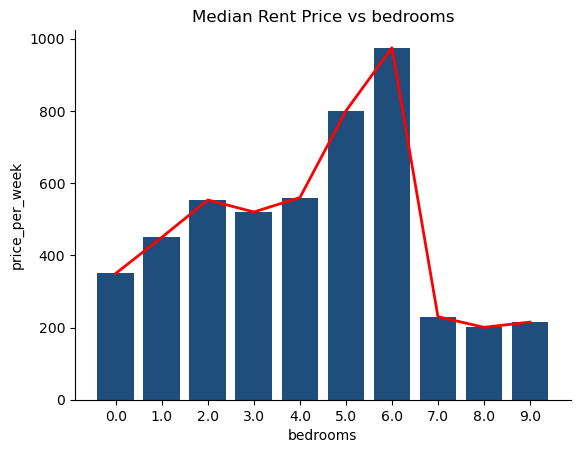

In [5]:
# plot rent vs bedrooms
plot_df = df.groupby('bedrooms')['price_per_week'].median()
plot_df = plot_df.reset_index()
ax = sns.barplot(x='bedrooms', y='price_per_week', data=plot_df, 
                 color='#104E8B')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
plt.plot(plot_df.index, plot_df['price_per_week'],color = 'red',linewidth=2.0)

plt.title('Median Rent Price vs bedrooms')
# plt.savefig('outputs/baths.png')
plt.savefig('../../plots/bedrooms.png', dpi = 600, bbox_inches = 'tight')


Text(0.5, 1.0, 'Median Rent Price vs Parking Spaces')

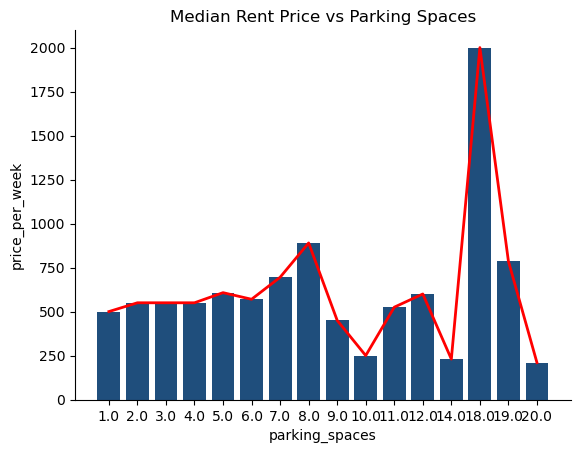

In [6]:
# plot rent vs parking
plot_df = df.groupby('parking_spaces')['price_per_week'].median()
plot_df = plot_df.reset_index()
ax = sns.barplot(x='parking_spaces', y='price_per_week', data=plot_df, 
                 color='#104E8B')
plt.plot(plot_df.index, plot_df['price_per_week'],color = 'red',linewidth=2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
plt.title('Median Rent Price vs Parking Spaces')
# plt.savefig('outputs/baths.png')

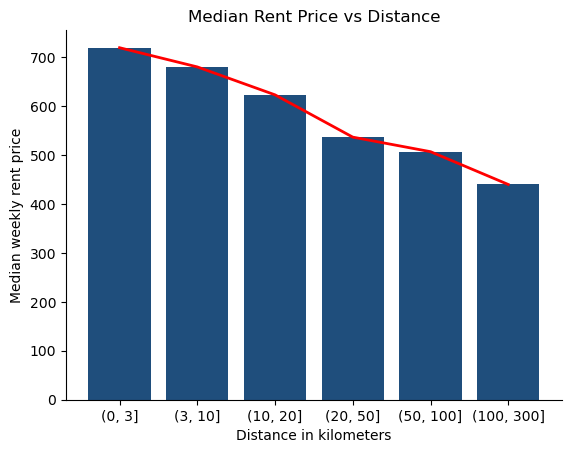

In [7]:
plot_df = df.groupby(by=df['distance_to_cbd'].apply
                     (lambda x: np.round(x, 1)))['price_per_week']\
                        .mean().iloc[1:]
plot_df = plot_df.reset_index()

# cut the distance into different bins
bins = [0, 3, 10, 20, 50, 100, 300]
plot_df['Distance in bins'] = pd.cut(plot_df['distance_to_cbd'], bins)


# plot the distance 
plot_df_distance = plot_df.groupby('Distance in bins')['price_per_week'].mean()
plot_df_distance = plot_df_distance.reset_index()
ax = sns.barplot(x='Distance in bins', y='price_per_week', 
                 data=plot_df_distance, color='#104E8B')
plt.plot([0,1,2,3,4,5], plot_df_distance['price_per_week'], 
         color = 'red', linewidth = 2.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
plt.title('Median Rent Price vs Distance')
plt.xlabel("Distance in kilometers")
plt.ylabel("Median weekly rent price")

plt.savefig('../../plots/distance.png', dpi = 600, bbox_inches = 'tight')